# Stock Data Analysis
### By: Daniel Wetta

In [1]:
#Stock Data Analysis 

In [2]:
# Must run this on Anaconda Powershell prompt:
# conda install quandl
# conda install pandas-datareader

# Must also create a QUANDL Account to use their API's (free)

In [3]:
conda install quandl

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import quandl
import datetime

#My API Key
quandl.ApiConfig.api_key = "y2T37y4hYDaU5BasgmcR"

# We will look at stock prices over the past year, starting at January 1, 2017
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), 
# third is the start date, fourth is the end date

s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)

 
type(apple)

pandas.core.frame.DataFrame

In [6]:
apple.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Adjusted Closing Price for Apple')

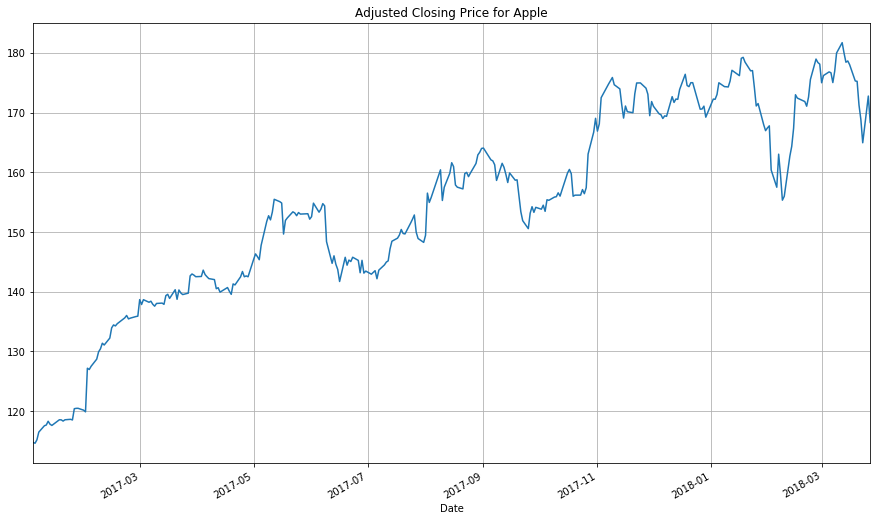

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt   
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) # Change the size of plots
 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL
plt.title('Adjusted Closing Price for Apple')

In [8]:
pip install mpl-finance

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /Users/jetta47/opt/anaconda3/lib/python3.7/site-packages (0.12.3a3)
Note: you may need to restart the kernel to use updated packages.


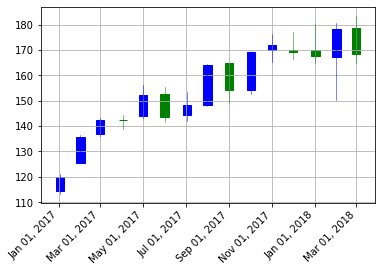

In [11]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", adj = False, otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param adj: A boolean indicating whether to use adjusted prices
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    fields = ["Open", "High", "Low", "Close"]
    if adj:
        fields = ["Adj. " + s for s in fields]
    transdat = dat.loc[:,fields]
    transdat.columns = pd.Index(["Open", "High", "Low", "Close"])
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('300 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "blue", colordown = "green", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True, figsize=(10,10))
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()
 
pandas_candlestick_ohlc(apple, adj=True, stick="month")

In [12]:
microsoft, google = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["MSFT", "GOOG"])
 
# Below I create a DataFrame consisting of the adjusted closing price of these stocks, 
# first by making a list of these objects and using the join method

stocks = pd.DataFrame({"AAPL": apple["Adj. Close"],
                      "MSFT": microsoft["Adj. Close"],
                      "GOOG": google["Adj. Close"]})
 
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,114.715378,61.219142,786.14
2017-01-04,114.586983,60.945231,786.90
2017-01-05,115.169696,60.945231,794.02
2017-01-06,116.453639,61.473488,806.15
2017-01-09,117.520300,61.277837,806.65


Text(0.5, 1.0, 'Absolute Price for Apple, Microsoft, and Google')

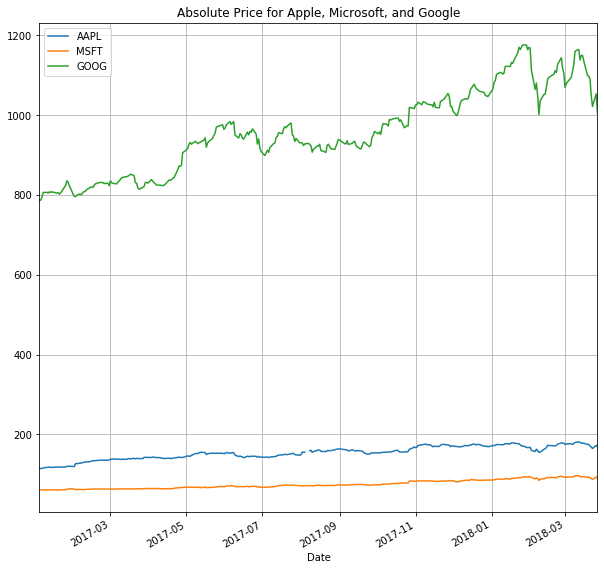

In [13]:
stocks.plot(grid = True, figsize=(10,10))
plt.title('Absolute Price for Apple, Microsoft, and Google')

Text(0.5, 1.0, 'Relative Change of an Asset for Apple, Microsoft, and Google')

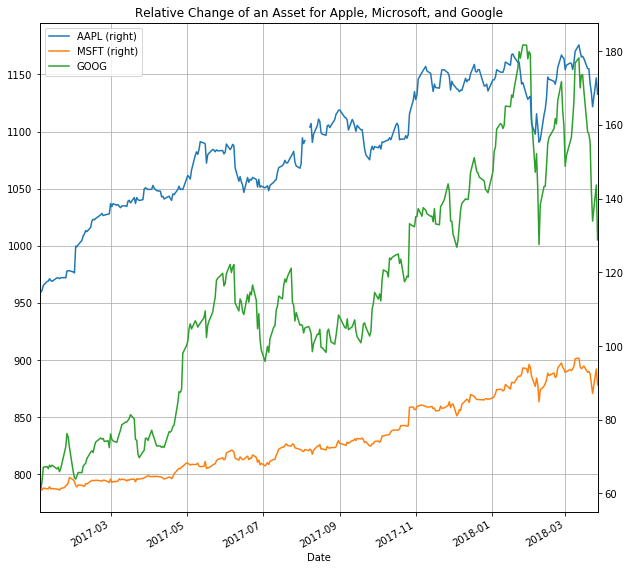

In [14]:
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True, figsize=(10,10))
plt.title('Relative Change of an Asset for Apple, Microsoft, and Google')

In [15]:
# python
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; 
# in this case, x will be a pandas Series object

stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,0.000000,0.000000,0.000000
2017-01-04,-0.001119,-0.004474,0.000967
2017-01-05,0.003960,-0.004474,0.010024
2017-01-06,0.015153,0.004155,0.025453
2017-01-09,0.024451,0.000959,0.026090


Text(0.5, 1.0, 'Stock Returns for Apple, Microsoft, and Google')

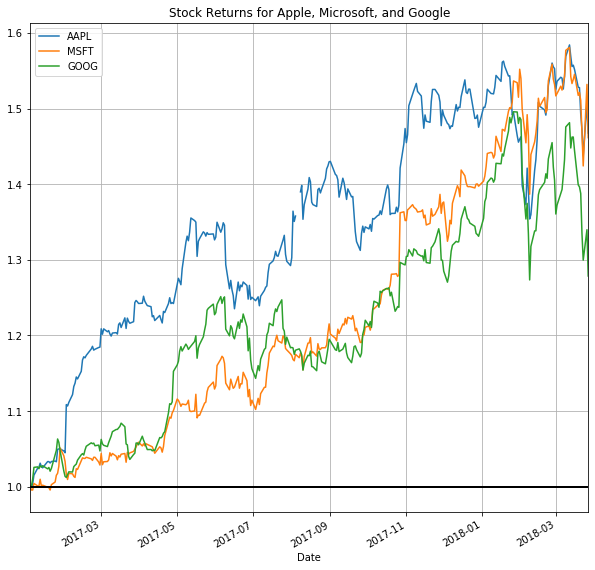

In [16]:
stock_return.plot(grid = True, figsize=(10,10)).axhline(y = 1, color = "black", lw = 2)
plt.title('Stock Returns for Apple, Microsoft, and Google')

In [17]:
# Log Differences:

#Advantage: The difference can be interpreted as the percentage change in a stock 
#but does not depend on the denominator of a fraction. 

#Desirable property: The sum of the log differences can be interpreted as the total change (as a percentage) 
#over the period summed (which is not a property of the other formulations; 
#they will overestimate growth). 

#Log differences also more cleanly correspond to how stock prices are modeled in continuous time.

In [18]:
# NumPy's log function
import numpy as np
 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,-0.001120,-0.004484,0.000966
2017-01-05,0.005072,0.000000,0.009007
2017-01-06,0.011087,0.008630,0.015161
2017-01-09,0.009118,-0.003188,0.000620


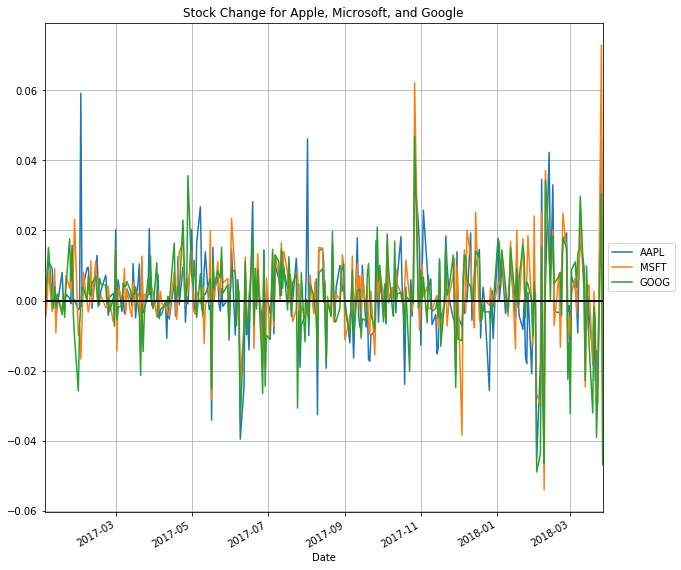

In [19]:
stock_change.plot(grid = True, figsize=(10,10)).axhline(y = 0, color = "black", lw = 2)
plt.title('Stock Change for Apple, Microsoft, and Google')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
# Read from a file, obtained from here: http://www.nasdaq.com/symbol/spy/historical
# Read the SPDR S&P 500 ("SPY") SPY info into a DataFrame
import pandas as pd
spyderdat = pd.read_csv("../Stocks/SPY.csv", delimiter=',') # Specific to my system
spyderdat = pd.DataFrame(spyderdat)
spyderdat.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/17/2020,252.80,262070500,245.04,256.1700,237.0700
1,03/16/2020,239.85,297240000,241.18,256.9000,237.3600
2,03/13/2020,269.32,329566100,263.09,271.4754,248.5237
3,03/12/2020,248.11,392220700,256.00,266.6600,247.6800
4,03/11/2020,274.36,256416600,280.70,281.9400,270.8800


In [21]:
spyderdat.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [22]:
spyderdat = pd.DataFrame(spyderdat.loc[:, ['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']].iloc[1:].as_matrix(),
                         index=pd.DatetimeIndex(spyderdat.iloc[1:, 0]),
                         columns=['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']
                        ).sort_index()

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
spyder = spyderdat.loc[start:end]

In [24]:
stocks = stocks.join(spyder.loc[:, ' Close/Last']).rename(columns={' Close/Last': "SPY"})

In [25]:
stocks.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2017-01-03,114.715378,61.219142,786.14,225.24
2017-01-04,114.586983,60.945231,786.90,226.58
2017-01-05,115.169696,60.945231,794.02,226.4
2017-01-06,116.453639,61.473488,806.15,227.21
2017-01-09,117.520300,61.277837,806.65,226.46


Text(0.5, 1.0, 'Stock Returns for Apple, Microsoft, Google, and SPDR S&P 500')

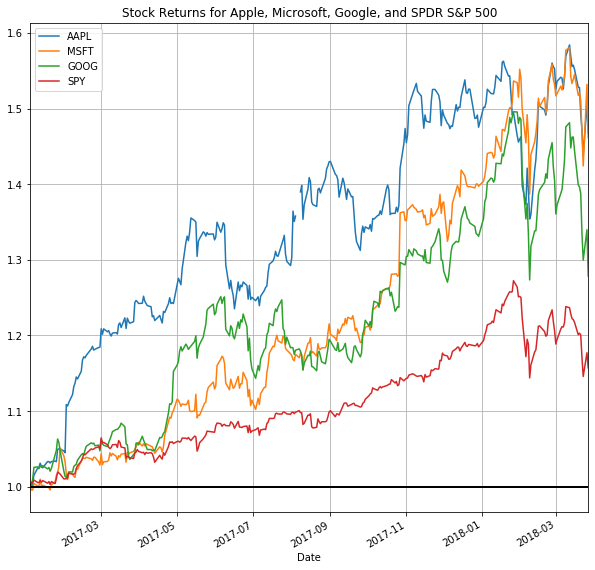

In [26]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True, figsize=(10,10)).axhline(y = 1, color = "black", lw = 2)
plt.title('Stock Returns for Apple, Microsoft, Google, and SPDR S&P 500')

In [27]:
stocks.dtypes

AAPL    float64
MSFT    float64
GOOG    float64
SPY      object
dtype: object

In [28]:
stocks['SPY']=stocks['SPY'].astype('float64')

In [29]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

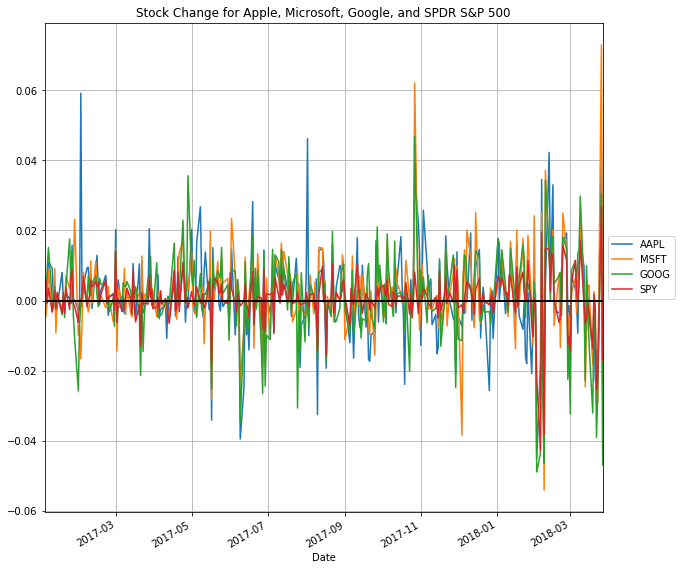

In [30]:
stock_change.plot(grid=True, figsize=(10,10)).axhline(y = 0, color = "black", lw = 2,)
plt.title('Stock Change for Apple, Microsoft, Google, and SPDR S&P 500')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Classical Risk Metrics

In [31]:
#Annual percentage rate (APR)

In [32]:
# There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr = stock_change * 252 * 100    
stock_change_apr.tail()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2018-03-21,-577.463148,-176.499833,-157.285338,-48.409635
2018-03-22,-359.355133,-743.873619,-984.592233,-637.937081
2018-03-23,-589.663945,-743.366326,-669.637836,-542.932908
2018-03-26,1168.762361,1839.012005,768.649993,680.185034
2018-03-27,-654.582257,-1185.615651,-1178.241231,-432.385872


In [33]:
# Risk-free rate (The rate of return on a risk-free financial asset)

In [34]:
tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
tbill.tail()

,Value
Date,
2019-10-01,1.65
2019-11-01,1.54
2019-12-01,1.54
2020-01-01,1.52
2020-02-01,1.52


Text(0.5, 1.0, 'Risk-Free Rate Graph')

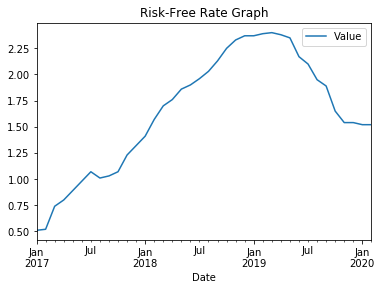

In [35]:
tbill.plot()
plt.title('Risk-Free Rate Graph')

In [36]:
# Most recent Treasury Bill rate
rrf = tbill.iloc[-1, 0]  
rrf

1.52

In [41]:
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY) 

# Since RRF is constant it doesn't change the
# correlation so we can ignore it in our calculation

smcorr

AAPL    0.621166
MSFT    0.737923
GOOG    0.733031
dtype: float64

In [42]:
# Then I compute \alpha and \beta.

In [43]:
sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()
sy

AAPL    312.375699
MSFT    302.202353
GOOG    308.232965
dtype: float64

In [44]:
# Standard deviation for x
sx 

170.4682751223667

In [45]:
ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf
ybar

AAPL    28.144423
MSFT    29.525374
GOOG    18.583335
dtype: float64

In [46]:
xbar

10.410740715808572

In [47]:
beta = smcorr * sy / sx
alpha = ybar - beta * xbar
beta

AAPL    1.138260
MSFT    1.308174
GOOG    1.325433
dtype: float64

In [48]:
alpha

AAPL    16.294291
MSFT    15.906316
GOOG     4.784591
dtype: float64

In [49]:
# Sharpe ratio: (Sharpe ratio is the stock's returns minus the risk free rate 
# over the stock's volatility)

In [50]:
sharpe = (ybar - rrf)/sy
sharpe

AAPL    0.085232
MSFT    0.092671
GOOG    0.055359
dtype: float64

In [51]:
(xbar - rrf)/sx

0.05215481126577107

# Moving Averages

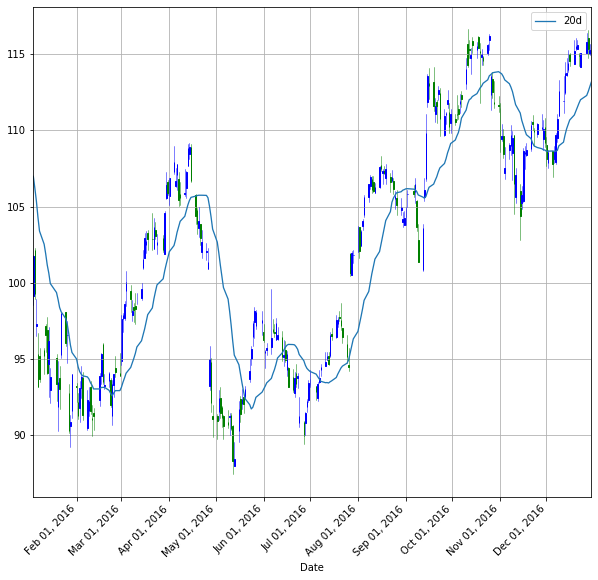

In [52]:
start = datetime.datetime(2010,1,1)
apple = quandl.get("WIKI/AAPL", start_date=start, end_date=end)
apple["20d"] = np.round(apple["Adj. Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = "20d", adj=True)

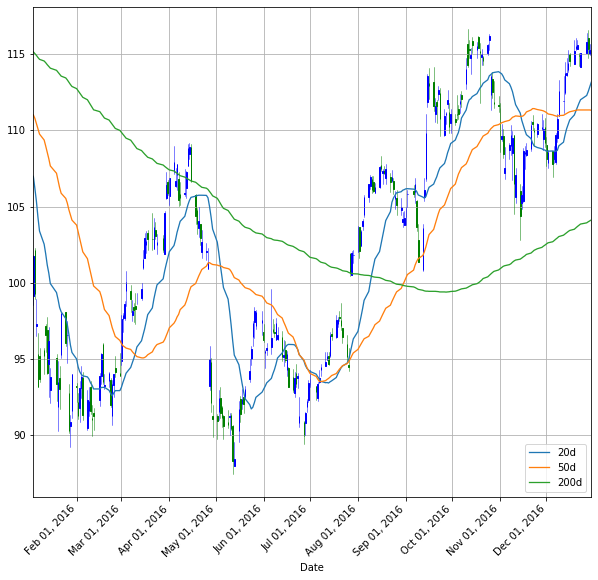

In [53]:
apple["50d"] = np.round(apple["Adj. Close"].rolling(window = 50, center = False).mean(), 2)
apple["200d"] = np.round(apple["Adj. Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-12-31',:], otherseries = ["20d", "50d", "200d"], adj=True)

In [54]:
# Bearish trend: the stock is trending downward over time.

In [55]:
# Bullish trend: the stock is trending upward over time.

In [56]:
# Trading signals: indications that a financial security is changing direction and a profitable trade might be made.

# Trading Strategy

In [57]:
apple['20d-50d'] = apple['20d'] - apple['50d']
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,200d,20d-50d
Date,,,,,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94,172.57,162.68,4.37
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76,172.46,162.75,4.30
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23,172.27,162.81,3.96
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92,172.22,162.91,3.70
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41,172.05,162.98,3.36


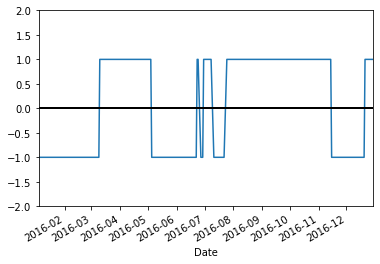

In [58]:
# np.where() is a vectorized if-else function, 
# where a condition is checked for each component of a vector, 
# and the first argument passed is used when the condition holds, and the other passed if it does not

apple["Regime"] = np.where(apple['20d-50d'] > 0, 1, 0)

# We have 1's for bullish regimes and 0's for everything else. 
# Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, 
# the second argument is apple["Regime"]

apple["Regime"] = np.where(apple['20d-50d'] < 0, -1, apple["Regime"])
apple.loc['2016-01-04':'2016-12-31',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)


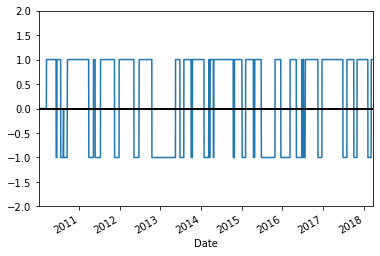

In [59]:
apple["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)


In [60]:
apple["Regime"].value_counts()

 1    1323
-1     694
 0      53
Name: Regime, dtype: int64

In [61]:
# To ensure that all trades close out, I temporarily change the regime of the last row to 0
regime_orig = apple.loc[:, "Regime"].iloc[-1]
apple.loc[:, "Regime"].iloc[-1] = 0
apple["Signal"] = np.sign(apple["Regime"] - apple["Regime"].shift(1))

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
# Restore original regime data
apple.loc[:, "Regime"].iloc[-1] = regime_orig
apple.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,20d,50d,200d,20d-50d,Regime,Signal
Date,,,,,,,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0,176.94,172.57,162.68,4.37,1,0.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0,176.76,172.46,162.75,4.30,1,0.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0,176.23,172.27,162.81,3.96,1,0.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0,175.92,172.22,162.91,3.70,1,0.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0,175.41,172.05,162.98,3.36,1,-1.0


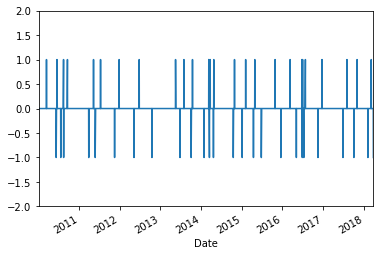

In [64]:
apple["Signal"].plot(ylim = (-2, 2))

In [65]:
apple["Signal"].value_counts()

 0.0    2014
-1.0      28
 1.0      27
Name: Signal, dtype: int64

In [66]:
apple.loc[apple["Signal"] == 1, "Close"]

Date
2010-03-16    224.450
2010-06-18    274.074
2010-08-16    247.640
2010-09-20    283.230
2011-05-12    346.570
2011-07-14    357.770
2011-12-28    402.640
2012-06-25    570.765
2013-05-17    433.260
2013-07-31    452.530
2013-10-16    501.114
2014-03-11    536.090
2014-03-12    536.610
2014-03-24    539.190
2014-04-25    571.940
2014-10-28    106.740
2015-02-05    119.940
2015-04-28    130.560
2015-10-27    114.550
2016-03-10    101.170
2016-06-23     96.100
2016-06-30     95.600
2016-07-25     97.340
2016-12-21    117.060
2017-08-02    157.140
2017-11-01    166.890
2018-03-08    176.940
Name: Close, dtype: float64

In [67]:
apple.loc[apple["Signal"] == -1, "Close"]

Date
2010-06-11    253.5100
2010-07-22    259.0240
2010-08-17    251.9700
2011-03-30    348.6300
2011-03-31    348.5075
2011-05-27    337.4100
2011-11-17    377.4100
2012-05-09    569.1800
2012-10-17    644.6136
2013-06-26    398.0700
2013-10-04    483.0300
2014-01-28    506.5000
2014-03-17    526.7400
2014-04-22    531.6990
2014-10-17     97.6700
2015-01-05    106.2500
2015-04-16    126.1700
2015-06-25    127.5000
2015-06-26    126.7500
2015-12-18    106.0300
2016-05-05     93.2400
2016-06-27     92.0400
2016-07-11     96.9800
2016-11-15    107.1100
2017-06-27    143.7400
2017-10-03    154.4800
2018-02-06    163.0300
2018-03-27    168.3400
Name: Close, dtype: float64

In [68]:
# Create a DataFrame with trades, including the price at the trade and the regime under which the trade is made.
apple_signals = pd.concat([
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == 1, "Adj. Close"],
                     "Regime": apple.loc[apple["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": apple.loc[apple["Signal"] == -1, "Adj. Close"],
                     "Regime": apple.loc[apple["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
apple_signals.sort_index(inplace = True)
apple_signals

,Price,Regime,Signal
Date,,,
2010-03-16,28.844953,1,Buy
2010-06-11,32.579568,-1,Sell
2010-06-18,35.222329,1,Buy
2010-07-22,33.288194,-1,Sell
2010-08-16,31.825192,0,Buy
2010-08-17,32.381657,-1,Sell
2010-09-20,36.399003,1,Buy
2011-03-30,44.803814,0,Sell
2011-03-31,44.788071,-1,Sell


In [69]:
# Profitability of long trades for Apple
apple_long_profits = pd.DataFrame({
        "Price": apple_signals.loc[(apple_signals["Signal"] == "Buy") &
                                  apple_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(apple_signals["Price"] - apple_signals["Price"].shift(1)).loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": apple_signals["Price"].loc[
            apple_signals.loc[(apple_signals["Signal"].shift(1) == "Buy") & (apple_signals["Regime"].shift(1) == 1)].index
        ].index
    })
apple_long_profits

,Price,Profit,End Date
Date,,,
2010-03-16,28.844953,3.734615,2010-06-11
2010-06-18,35.222329,-1.934135,2010-07-22
2010-09-20,36.399003,8.404812,2011-03-30
2011-05-12,44.539075,-1.177188,2011-05-27
2011-07-14,45.978431,2.524014,2011-11-17
2011-12-28,51.744852,21.402711,2012-05-09
2012-06-25,73.351258,9.844240,2012-10-17
2013-05-17,56.878472,-4.619751,2013-06-26
2013-07-31,59.408242,4.423577,2013-10-04


In [70]:
# We need to get the low of the price during each trade for Apple
tradeperiods = pd.DataFrame({"Start": apple_long_profits.index,
                            "End": apple_long_profits["End Date"]})
apple_long_profits["Low"] = tradeperiods.apply(lambda x: min(apple.loc[x["Start"]:x["End"], "Adj. Low"]), axis = 1)
apple_long_profits

,Price,Profit,End Date,Low
Date,,,,
2010-03-16,28.844953,3.734615,2010-06-11,25.606402
2010-06-18,35.222329,-1.934135,2010-07-22,30.791939
2010-09-20,36.399003,8.404812,2011-03-30,35.341333
2011-05-12,44.539075,-1.177188,2011-05-27,42.335061
2011-07-14,45.978431,2.524014,2011-11-17,45.367990
2011-12-28,51.744852,21.402711,2012-05-09,51.471117
2012-06-25,73.351258,9.844240,2012-10-17,72.688768
2013-05-17,56.878472,-4.619751,2013-06-26,51.942335
2013-07-31,59.408242,4.423577,2013-10-04,59.001273


In [95]:
# Simulate this strategy in apple_adj_long_profits
cash = 1000000
apple_backtest = pd.DataFrame({"Start Port. Value": [],
                         "End Port. Value": [],
                         "End Date": [],
                         "Shares": [],
                         "Share Price": [],
                         "Trade Value": [],
                         "Profit per Share": [],
                         "Total Profit": [],
                         "Stop-Loss Triggered": []})
port_value = .1  # Max proportion of portfolio bet on any trade
batch = 100      # Number of shares bought per batch
stoploss = .2    # % of trade loss that would trigger a stoploss
for index, row in apple_long_profits.iterrows():
    batches = np.floor(cash * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
    trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
    if row["Low"] < (1 - stoploss) * row["Price"]:   # Account for the stop-loss
        share_profit = np.round((1 - stoploss) * row["Price"], 2)
        stop_trig = True
    else:
        share_profit = row["Profit"]
        stop_trig = False
    profit = share_profit * batches * batch # Compute profits
    
    # Add a row to the backtest data frame containing the results of the trade
    apple_backtest = apple_backtest.append(pd.DataFrame({
                "Start Port. Value": cash,
                "End Port. Value": cash + profit,
                "End Date": row["End Date"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": trade_val,
                "Profit per Share": share_profit,
                "Total Profit": profit,
                "Stop-Loss Triggered": stop_trig
            }, index = [index]))
    cash = max(0, cash + profit)
 
apple_backtest

,Start Port. Value,End Port. Value,End Date,Shares,Share Price,Trade Value,Profit per Share,Total Profit,Stop-Loss Triggered
2010-03-16,1.000000e+06,1.012698e+06,2010-06-11,3400.0,28.844953,98072.841239,3.734615,12697.691096,0.0
2010-06-18,1.012698e+06,1.007282e+06,2010-07-22,2800.0,35.222329,98622.521053,-1.934135,-5415.577333,0.0
2010-09-20,1.007282e+06,1.029975e+06,2011-03-30,2700.0,36.399003,98277.306914,8.404812,22692.991110,0.0
2011-05-12,1.029975e+06,1.027268e+06,2011-05-27,2300.0,44.539075,102439.873355,-1.177188,-2707.531638,0.0
2011-07-14,1.027268e+06,1.032820e+06,2011-11-17,2200.0,45.978431,101152.549241,2.524014,5552.830218,0.0
2011-12-28,1.032820e+06,1.073486e+06,2012-05-09,1900.0,51.744852,98315.218526,21.402711,40665.151235,0.0
2012-06-25,1.073486e+06,1.087267e+06,2012-10-17,1400.0,73.351258,102691.760672,9.844240,13781.935982,0.0
2013-05-17,1.087267e+06,1.078490e+06,2013-06-26,1900.0,56.878472,108069.096937,-4.619751,-8777.527400,0.0
2013-07-31,1.078490e+06,1.086452e+06,2013-10-04,1800.0,59.408242,106934.835757,4.423577,7962.438409,0.0
2013-10-16,1.086452e+06,1.088218e+06,2014-01-28,1600.0,66.221597,105954.555657,1.103650,1765.839598,0.0


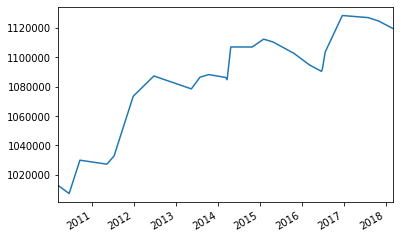

In [72]:
apple_backtest["End Port. Value"].plot()

In [73]:
def ma_crossover_orders(stocks, fast, slow):
    """
    :param stocks: A list of tuples, the first argument in each tuple being a string containing the ticker symbol of each stock (or however you want the stock represented, so long as it's unique), and the second being a pandas DataFrame containing the stocks, with a "Close" column and indexing by date (like the data frames returned by the Yahoo! Finance API)
    :param fast: Integer for the number of days used in the fast moving average
    :param slow: Integer for the number of days used in the slow moving average
 
    :return: pandas DataFrame containing stock orders
 
    This function takes a list of stocks and determines when each stock would be bought or sold depending on a moving average crossover strategy, returning a data frame with information about when the stocks in the portfolio are bought or sold according to the strategy
    """
    fast_str = str(fast) + 'd'
    slow_str = str(slow) + 'd'
    ma_diff_str = fast_str + '-' + slow_str
 
    trades = pd.DataFrame({"Price": [], "Regime": [], "Signal": []})
    for s in stocks:
        # Get the moving averages, both fast and slow, along with the difference in the moving averages
        s[1][fast_str] = np.round(s[1]["Close"].rolling(window = fast, center = False).mean(), 2)
        s[1][slow_str] = np.round(s[1]["Close"].rolling(window = slow, center = False).mean(), 2)
        s[1][ma_diff_str] = s[1][fast_str] - s[1][slow_str]
 
        # np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
        s[1]["Regime"] = np.where(s[1][ma_diff_str] > 0, 1, 0)
        # We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
        s[1]["Regime"] = np.where(s[1][ma_diff_str] < 0, -1, s[1]["Regime"])
        # To ensure that all trades close out, I temporarily change the regime of the last row to 0
        regime_orig = s[1].loc[:, "Regime"].iloc[-1]
        s[1].loc[:, "Regime"].iloc[-1] = 0
        s[1]["Signal"] = np.sign(s[1]["Regime"] - s[1]["Regime"].shift(1))
        # Restore original regime data
        s[1].loc[:, "Regime"].iloc[-1] = regime_orig
 
        # Get signals
        signals = pd.concat([
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == 1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == 1, "Regime"],
                         "Signal": "Buy"}),
            pd.DataFrame({"Price": s[1].loc[s[1]["Signal"] == -1, "Adj. Close"],
                         "Regime": s[1].loc[s[1]["Signal"] == -1, "Regime"],
                         "Signal": "Sell"}),
        ])
        signals.index = pd.MultiIndex.from_product([signals.index, [s[0]]], names = ["Date", "Symbol"])
        trades = trades.append(signals)
 
    trades.sort_index(inplace = True)
    trades.index = pd.MultiIndex.from_tuples(trades.index, names = ["Date", "Symbol"])
 
    return trades

In [74]:
def backtest(signals, cash, port_value = .1, batch = 100):
    """
    :param signals: pandas DataFrame containing buy and sell signals with stock prices and symbols, like that returned by ma_crossover_orders
    :param cash: integer for starting cash value
    :param port_value: maximum proportion of portfolio to risk on any single trade
    :param batch: Trading batch sizes
 
    :return: pandas DataFrame with backtesting results
 
    This function backtests strategies, with the signals generated by the strategies being passed in the signals DataFrame. A fictitious portfolio is simulated and the returns generated by this portfolio are reported.
    """
 
    SYMBOL = 1 # Constant for which element in index represents symbol
    portfolio = dict()    # Will contain how many stocks are in the portfolio for a given symbol
    port_prices = dict()  # Tracks old trade prices for determining profits
    # Dataframe that will contain backtesting report
    results = pd.DataFrame({"Start Cash": [],
                            "End Cash": [],
                            "Portfolio Value": [],
                            "Type": [],
                            "Shares": [],
                            "Share Price": [],
                            "Trade Value": [],
                            "Profit per Share": [],
                            "Total Profit": []})
 
    for index, row in signals.iterrows():
        # These first few lines are done for any trade
        shares = portfolio.setdefault(index[SYMBOL], 0)
        trade_val = 0
        batches = 0
        cash_change = row["Price"] * shares   # Shares could potentially be a positive or negative number (cash_change will be added in the end; negative shares indicate a short)
        portfolio[index[SYMBOL]] = 0  # For a given symbol, a position is effectively cleared
 
        old_price = port_prices.setdefault(index[SYMBOL], row["Price"])
        portfolio_val = 0
        for key, val in portfolio.items():
            portfolio_val += val * port_prices[key]
 
        if row["Signal"] == "Buy" and row["Regime"] == 1:  # Entering a long position
            batches = np.floor((portfolio_val + cash) * port_value) // np.ceil(batch * row["Price"]) # Maximum number of batches of stocks invested in
            trade_val = batches * batch * row["Price"] # How much money is put on the line with each trade
            cash_change -= trade_val  # We are buying shares so cash will go down
            portfolio[index[SYMBOL]] = batches * batch  # Recording how many shares are currently invested in the stock
            port_prices[index[SYMBOL]] = row["Price"]   # Record price
            old_price = row["Price"]
        elif row["Signal"] == "Sell" and row["Regime"] == -1: # Entering a short
            pass
            # Do nothing; can we provide a method for shorting the market?
        #else:
            #raise ValueError("I don't know what to do with signal " + row["Signal"])
 
        pprofit = row["Price"] - old_price   # Compute profit per share; old_price is set in such a way that entering a position results in a profit of zero
 
        # Update report
        results = results.append(pd.DataFrame({
                "Start Cash": cash,
                "End Cash": cash + cash_change,
                "Portfolio Value": cash + cash_change + portfolio_val + trade_val,
                "Type": row["Signal"],
                "Shares": batch * batches,
                "Share Price": row["Price"],
                "Trade Value": abs(cash_change),
                "Profit per Share": pprofit,
                "Total Profit": batches * batch * pprofit
            }, index = [index]))
        cash += cash_change  # Final change to cash balance
 
    results.sort_index(inplace = True)
    results.index = pd.MultiIndex.from_tuples(results.index, names = ["Date", "Symbol"])
 
    return results

In [75]:
# Get more stocks
(microsoft, google, facebook, twitter, netflix,
amazon, yahoo, ge, qualcomm, ibm, hp) = (quandl.get("WIKI/" + s, start_date=start,
                                                                         end_date=end) for s in ["MSFT", "GOOG", "FB", "TWTR",
                                                                                                 "NFLX", "AMZN", "YHOO", "GE",
                                                                                                 "QCOM", "IBM", "HPQ"])

In [76]:
signals = ma_crossover_orders([("AAPL", apple),
                              ("MSFT",  microsoft),
                              ("GOOG",  google),
                              ("FB",    facebook),
                              ("TWTR",  twitter),
                              ("NFLX",  netflix),
                              ("AMZN",  amazon),
                              ("YHOO",  yahoo),
                              ("GE",    ge),
                              ("QCOM",  qualcomm),
                              ("IBM",   ibm),
                              ("HPQ",   hp)],
                            fast = 20, slow = 50)
signals

Price  Regime Signal
Date       Symbol                           
2010-03-16 AAPL     28.844953     1.0    Buy
           AMZN    131.790000     1.0    Buy
           GE       14.129260     1.0    Buy
           HPQ      19.921951     1.0    Buy
           IBM     105.460506     1.0    Buy
...                       ...     ...    ...
2018-03-27 IBM     151.910000    -1.0    Buy
           MSFT     89.470000     1.0   Sell
           NFLX    300.690000     1.0   Sell
           QCOM     54.840000    -1.0    Buy
           TWTR     28.070000     1.0   Sell

[509 rows x 3 columns]

In [77]:
bk = backtest(signals, 1000000)
bk

Start Cash      End Cash  Portfolio Value  Type  Shares  \
Date       Symbol                                                              
2010-03-16 AAPL    1.000000e+06  9.019272e+05     1.000000e+06   Buy  3400.0   
           AMZN    9.019272e+05  8.096742e+05     1.000000e+06   Buy   700.0   
           GE      8.096742e+05  7.107693e+05     1.000000e+06   Buy  7000.0   
           HPQ     7.107693e+05  6.111596e+05     1.000000e+06   Buy  5000.0   
           IBM     6.111596e+05  5.162451e+05     1.000000e+06   Buy   900.0   
...                         ...           ...              ...   ...     ...   
2018-03-27 IBM     1.740412e+06  1.740412e+06     2.350900e+06   Buy     0.0   
           MSFT    1.740412e+06  2.026716e+06     2.451672e+06  Sell     0.0   
           NFLX    2.026716e+06  2.327406e+06     2.543052e+06  Sell     0.0   
           QCOM    2.327406e+06  2.327406e+06     2.543052e+06   Buy     0.0   
           TWTR    2.327406e+06  2.683895e+06     2.683895e+06  Sell     0.0   

                   Share Price    Trade Value  Profit per Share  Total Profit  
Date       Symbol                                                              
2010-03-16 AAPL      28.844953   98072.841239          0.000000           0.0  
           AMZN     131.790000   92253.000000          0.000000           0.0  
           GE        14.129260   98904.822860          0.000000           0.0  
           HPQ       19.921951   99609.756314          0.000000           0.0  
           IBM      105.460506   94914.455453          0.000000           0.0  
...                        ...            ...               ...           ...  
2018-03-27 IBM      151.910000       0.000000          6.798221           0.0  
           MSFT      89.470000  286304.000000         31.491454           0.0  
           NFLX     300.690000  300690.000000         91.380000           0.0  
           QCOM      54.840000       0.000000        -13.200000          -0.0  
           TWTR      28.070000  356489.000000         11.090000           0.0  

[509 rows x 9 columns]

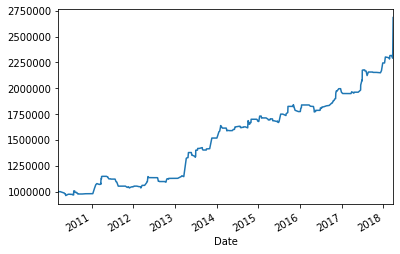

In [78]:
bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]).plot()

# Benchmarking

In [88]:
#Trying to match our returns with the market rather than beat it.

In [89]:
#Profits for buying and holding SPY

#spyder = web.DataReader("SPY", "yahoo", start, end)
spyder = spyderdat.loc[start:end]
spyder.iloc[[0,-1],:]

,Date,Close/Last,Volume,Open,High,Low
Date,,,,,,
2010-03-18,03/18/2010,117.037,196293000,117.11,117.27,116.57
2020-03-16,03/16/2020,239.85,297240000,241.18,256.9,237.36


In [90]:
spyderdat.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [93]:
# Maximum number of batches of stocks invested in
batches = 1000000 // np.ceil(100 * spyder.loc[:, ' Close/Last'].iloc[0])

# How much money is used to buy SPY
trade_val = batches * batch * spyder.loc[:, ' Close/Last'].iloc[0] 

# Final value of the portfolio
final_val = batches * batch * spyder.loc[:, ' Close/Last'].iloc[-1] + (1000000 - trade_val) 
final_val

2043906.25

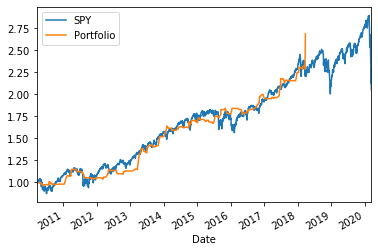

In [94]:
# Buy-and-hold strategy beats the strategy we developed earlier. 

ax_bench = (spyder[ ' Close/Last'] / spyder.loc[:, ' Close/Last'].iloc[0]).plot(label = "SPY")
ax_bench = (bk["Portfolio Value"].groupby(level = 0).apply(lambda x: x[-1]) / 1000000).plot(ax = ax_bench, label = "Portfolio")
ax_bench.legend(ax_bench.get_lines(), [l.get_label() for l in ax_bench.get_lines()], loc = 'best')
ax_bench